# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')

# Data extraction and cleaning

## Data Extraction

In [4]:
df = pd.read_csv('flight_fare.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Basic data exploration

In [5]:
df.shape

(10683, 11)

In [6]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.dropna(inplace=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [13]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [14]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [15]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Exploratory data analysis

## Datetime data

### Date of Journey column

In [16]:
df['Journay_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journay_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journay_weekday'] = pd.to_datetime(df['Date_of_Journey']).dt.weekday

df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,3
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,3


### Departure time column

In [17]:
df['Dep_Time_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Time_minutes'] = pd.to_datetime(df['Dep_Time']).dt.minute

df.drop(['Dep_Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,4,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,3,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,3,16,50


### Arrival time column

In [18]:
df['Arrival_Time_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Time_minutes'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(['Arrival_Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,3,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,3,16,50,21,35


### Duration column

In [19]:
duration = list(df['Duration'])

duration_hour = []
duration_minutes = []

for i in range(len(duration)):
    temp = duration[i].split()
    if len(temp) == 2:
        duration_hour.append(int(temp[0].split('h')[0]))
        duration_minutes.append(int(temp[1].split('m')[0]))
    else:
        if 'h' in temp[0]:
            duration_hour.append(int(temp[0].split('h')[0]))
            duration_minutes.append(0)
        else:
            duration_hour.append(0)
            duration_minutes.append(int(temp[0].split('m')[0]))
        
df['Duration_hour'] = duration_hour
df['Duration_minutes'] = duration_minutes

df.drop(['Duration'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,3,16,50,21,35,4,45


## Catagorical data

### Airline column

In [20]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

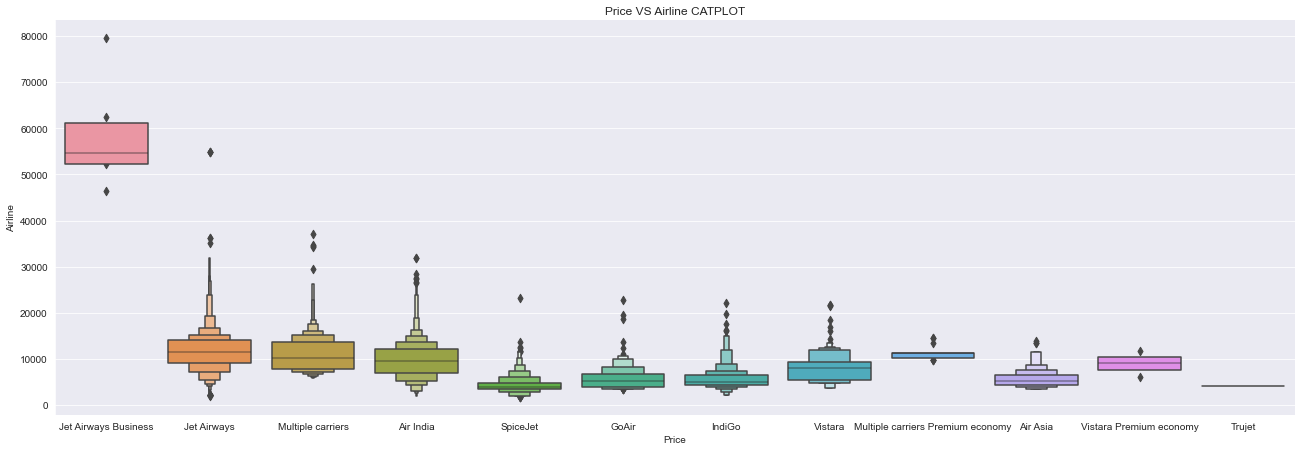

In [21]:
sns.catplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.title('Price VS Airline CATPLOT')
plt.xlabel('Price')
plt.ylabel('Airline')
plt.show()

In [22]:
df = df.loc[~((df['Airline']=='Jet Airways') | (df['Airline']=='Jet Airways Business'))]
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,21,5,1,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,5,20,45,23,20,2,35
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,3,11,30,14,10,2,40


### Source column

In [23]:
df['Source'].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

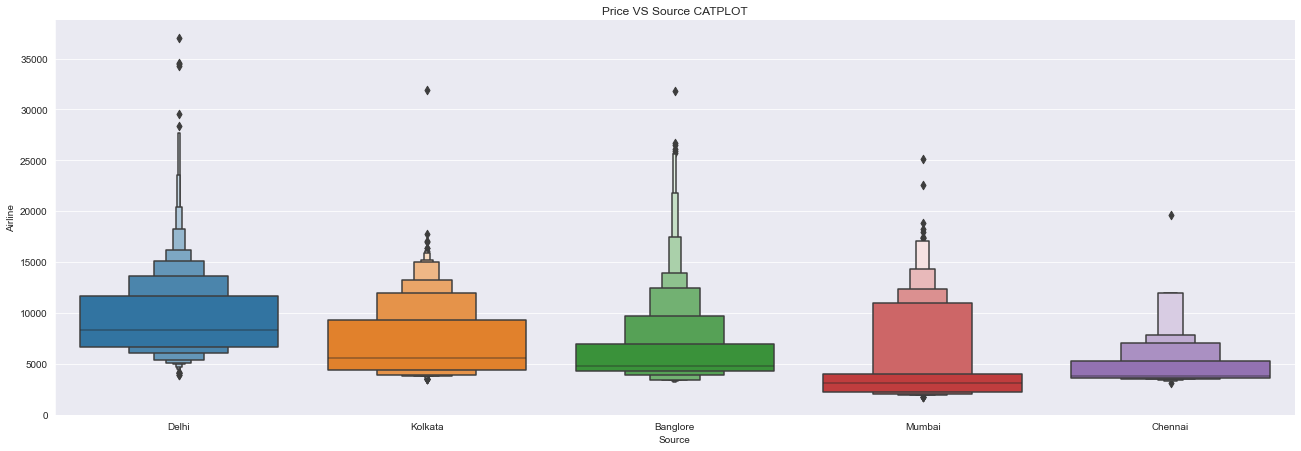

In [24]:
sns.catplot(x='Source', y='Price', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.title('Price VS Source CATPLOT')
plt.xlabel('Source')
plt.ylabel('Airline')
plt.show()

In [25]:
df = df[df['Price'] < 30000]
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,21,5,1,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,5,20,45,23,20,2,35
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,3,11,30,14,10,2,40


### Destination column

In [26]:
df['Destination'].value_counts()

Cochin       2944
Banglore     1614
Delhi         895
New Delhi     509
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

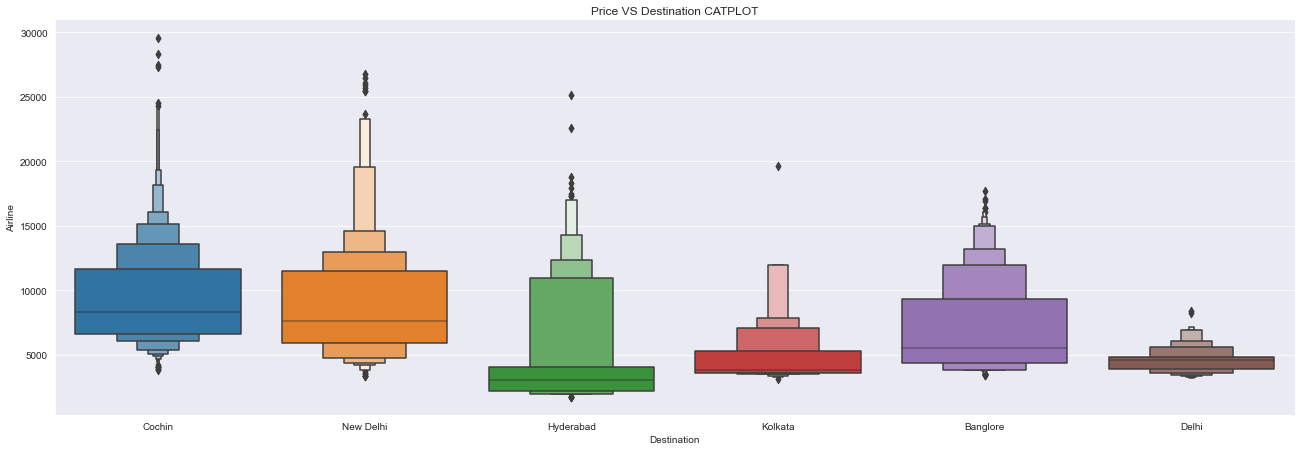

In [27]:
sns.catplot(x='Destination', y='Price', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.title('Price VS Destination CATPLOT')
plt.xlabel('Destination')
plt.ylabel('Airline')
plt.show()

In [28]:
df = df[df['Price'] < 27000]
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,21,5,1,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,5,20,45,23,20,2,35
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,3,11,30,14,10,2,40


In [29]:
#One-Hot Encoding

In [30]:
airline = df[['Airline']]
airline = pd.get_dummies(airline, drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


In [31]:
source = df[['Source']]
source = pd.get_dummies(source, drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [32]:
destination = df[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


### Route feature

In [33]:
# Route and no. of stops are doing the same thing

In [34]:
stops_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].map(stops_mapping)

df.drop('Route', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,No info,3873,24,6,0,9,0,11,25,2,25


### Additional info column

In [35]:
df['Additional_Info'].value_counts()

No info                         6381
No check-in baggage included     320
In-flight meal not included       96
1 Long layover                     7
Change airports                    7
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [36]:
df.drop('Additional_Info', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,0,9,0,11,25,2,25


In [37]:
df_final = pd.concat([df, airline, source, destination], axis=1)
df_final.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
df_final

,Total_Stops,Price,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,6,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,5,12,3,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,0,9,0,11,25,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3257,21,5,1,5,55,8,35,2,...,0,0,0,0,0,0,1,0,0,0
10678,0,4107,4,9,2,19,55,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,5,20,45,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10681,0,12648,3,1,3,11,30,14,10,2,...,0,0,0,0,0,0,0,0,0,1


## Correlation analysis

In [38]:
df_final.columns

Index(['Total_Stops', 'Price', 'Journay_day', 'Journay_month',
       'Journay_weekday', 'Dep_Time_hour', 'Dep_Time_minutes',
       'Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_hour',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [39]:
temp = df[['Total_Stops', 'Journay_day', 'Journay_month','Journay_weekday', 'Dep_Time_hour', 'Dep_Time_minutes','Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_hour','Duration_minutes']]

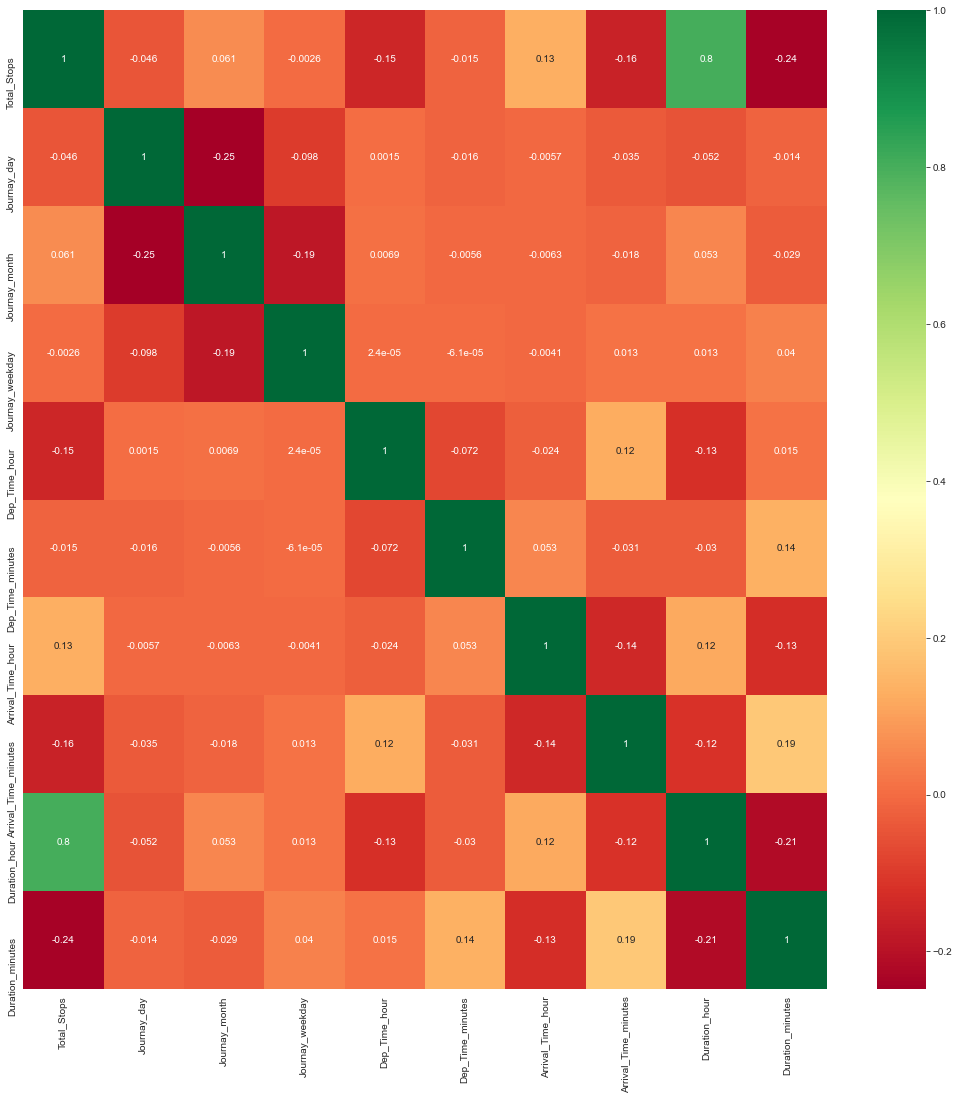

In [40]:
plt.figure(figsize=(18,18))
sns.heatmap(temp.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Feature importance

In [41]:
X = df_final.drop('Price', axis=1)
Y = df_final['Price']

In [42]:
from sklearn.ensemble import ExtraTreesRegressor

model_fi = ExtraTreesRegressor()
model_fi.fit(X, Y)

ExtraTreesRegressor()

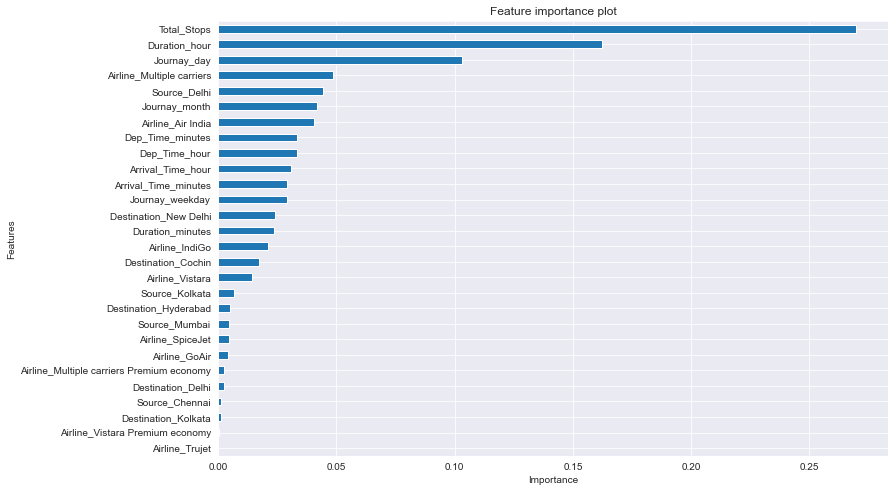

In [43]:
plt.figure(figsize=(12,8))

feat_importance = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')

plt.title('Feature importance plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [44]:
X.drop('Duration_hour',axis=1, inplace=True)
X

,Total_Stops,Journay_day,Journay_month,Journay_weekday,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,6,22,20,1,10,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,5,50,13,15,25,1,...,0,0,0,1,0,0,0,0,0,0
3,1,5,12,3,18,5,23,30,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,3,16,50,21,35,45,0,...,0,0,0,0,0,0,0,0,0,1
5,0,24,6,0,9,0,11,25,25,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,21,5,1,5,55,8,35,40,0,...,0,0,0,0,0,0,1,0,0,0
10678,0,4,9,2,19,55,22,25,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,5,20,45,23,20,35,1,...,0,0,0,1,0,0,0,0,0,0
10681,0,3,1,3,11,30,14,10,40,0,...,0,0,0,0,0,0,0,0,0,1


# Train/Test split

In [45]:
X = np.array(X)
Y = np.array(Y)

Y = Y.reshape(-1, 1)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# Normalisation

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

scaler_X.fit(X_train)
scaler_Y.fit(Y_train)

MinMaxScaler()

In [49]:
X_train = scaler_X.transform(X_train)
Y_train = scaler_Y.transform(Y_train)

X_test = scaler_X.transform(X_test)
Y_test = scaler_Y.transform(Y_test)

# Models

## Hyperparameters tuning

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
knn = KNeighborsRegressor()
ridge = Ridge()

In [57]:
n_neighbors = list(np.arange(start=1, stop=20, step=2, dtype='int64'))
lambdaa = list(np.arange(start=0, stop=200, step=20, dtype='int64'))

In [58]:
model_params = {
    'K-Neighbors Regressor':{
        'model': knn,
        'params':{
           'n_neighbors': n_neighbors
        }
    },
    'Ridge Regression':{
        'model': ridge,
        'params':{
           'alpha': lambdaa 
        }
    }
}

In [59]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='neg_mean_squared_error',
                                    n_iter=10, 
                                    cv=5,
                                    verbose=0)
    best_model.fit(X_train, Y_train)
    
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

In [60]:
best_params = pd.DataFrame(scores)
best_params

,model,Best Score,Best Parameter
0,K-Neighbors Regressor,-0.007019,{'n_neighbors': 5}
1,Ridge Regression,-0.008763,{'alpha': 20}


## Best Model

In [61]:
best_model = KNeighborsRegressor(n_neighbors=5)
best_model.fit(X_train, Y_train)

KNeighborsRegressor()

## Prediction on test data

In [62]:
Y_pred = best_model.predict(X_test)

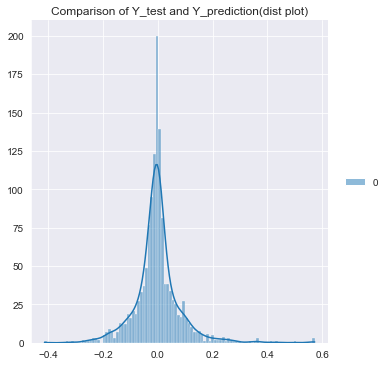

In [63]:
sns.displot(Y_test-Y_pred, kde=True)
plt.title('Comparison of Y_test and Y_prediction(dist plot)')
plt.ylabel('')
plt.show()

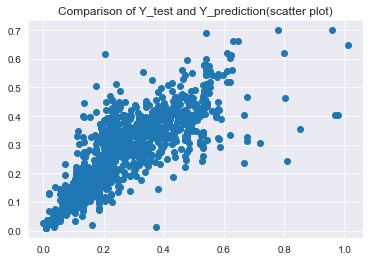

In [64]:
plt.scatter(Y_test, Y_pred)
plt.title('Comparison of Y_test and Y_prediction(scatter plot)')
plt.show()

In [65]:
print('Mean squared error on test data =', mean_squared_error(Y_test, Y_pred))

Mean squared error on test data = 0.007309350940556299


## Saving the best model

In [72]:
import joblib

In [73]:
file = open('flight_price_prediction.pkl', 'wb')
joblib.dump(best_model, file)

In [74]:
file = open('min_max_X.pkl', 'wb')
joblib.dump(scaler_X, file)

In [75]:
file = open('min_max_Y.pkl', 'wb')
joblib.dump(scaler_Y, file)